<a href="https://colab.research.google.com/github/Rendrikson98/Aprendizado-de-M-quina/blob/master/Atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Dataset de escolha**
    
    **Dados de casas para alugar**

    **Descrição**: As doenças cardiovasculares (DCVs) são a causa número 1 de morte no mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 recursos que podem ser usados ​​para prever a mortalidade por insuficiência cardíaca. A maioria das doenças cardiovasculares pode ser prevenida abordando os fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, sedentarismo e uso prejudicial de álcool, usando estratégias populacionais. Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, em que um modelo de aprendizado de máquina pode ser de grande ajuda.

**2. Leitura dos dados com o Pandas**


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
data.head(10) 



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


**3. Limpeza dos dados com o Pandas**

In [ ]:
#Verificar se existem valores NAN, ? ou dados faltantes
data = data.dropna()

#Excluir colunas irrelevantes
data = data.drop(columns=['time'])
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


**4. Análise preliminar dos dados**

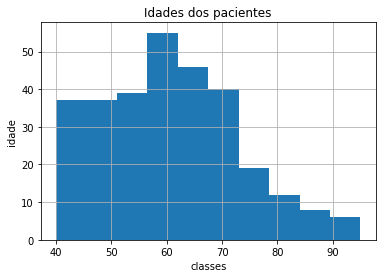

In [ ]:
# importando biblioteca para plotar gráficos
import matplotlib.pyplot as plt

#Idade dos pacientes
plt.hist(data['age'])
plt.xlabel('classes')
plt.ylabel('idade')
plt.title('Idades dos pacientes')
plt.grid(True)

In [ ]:
#contando quantidade de fumantes
print('Fumantes: ', data[data['smoking']==1].shape[0])
print('Não fumantes: ', data[data['smoking']==0].shape[0])

Fumantes:  96
Não fumantes:  203


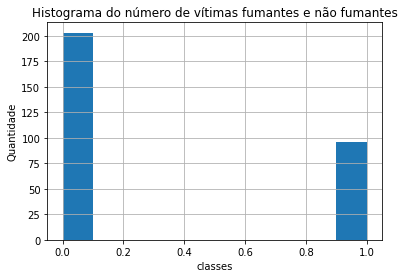

In [ ]:
plt.hist(data['smoking'])
plt.xlabel('classes')
plt.ylabel('Quantidade')
plt.title('Histograma do número de vítimas fumantes e não fumantes')
plt.grid(True)

In [ ]:
#Contando o número de vítimas pelo sexo masculino e feminino
print('Homens: ', data[data['sex']==1].shape[0])
print('Mulheres: ', data[data['sex']==0].shape[0])

Homens:  194
Mulheres:  105


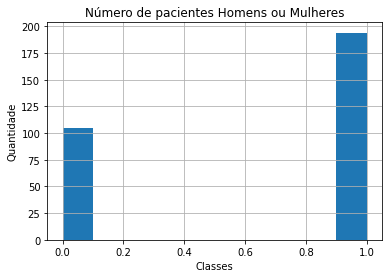

In [ ]:
plt.hist(data['sex'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Número de pacientes Homens ou Mulheres')
plt.grid(True)

In [ ]:
#Contando o número pacientes com diabetes
print('Com diabetes: ', data[data['diabetes']==1].shape[0])
print('Sem diabetes: ', data[data['diabetes']==0].shape[0])

Com diabetes:  125
Sem diabetes:  174


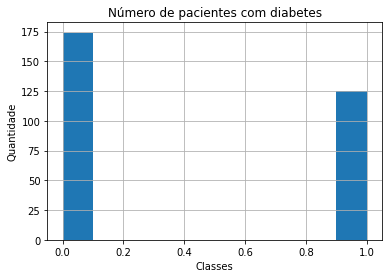

In [ ]:
plt.hist(data['diabetes'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Número de pacientes com diabetes')
plt.grid(True)

In [ ]:
#contando on número de vítimas com pressão alta
print('Sem pressão alta: ', data[data['high_blood_pressure']==1].shape[0])
print('Com pressão alta: ', data[data['high_blood_pressure']==0].shape[0])

Sem pressão alta:  105
Com pressão alta:  194


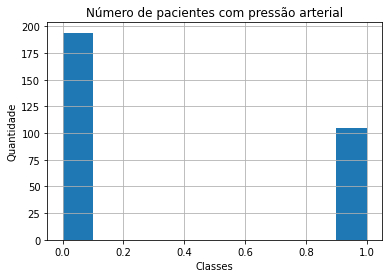

In [ ]:
plt.hist(data['high_blood_pressure'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Número de pacientes com pressão arterial')
plt.grid(True)

In [ ]:
print('Mortes por problemas cardiacos: ', data[data['DEATH_EVENT']==0].shape[0])
print('Casos sem mortes: ', data[data['DEATH_EVENT']==1].shape[0])

Mortes por problemas cardiacos:  203
Casos sem mortes:  96


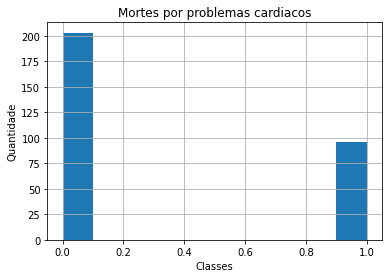

In [ ]:
#Mortes com problemas cardiacos
plt.hist(data['DEATH_EVENT'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Mortes por problemas cardiacos')
plt.grid(True)

**4.1 Distribuição de probabilidade**

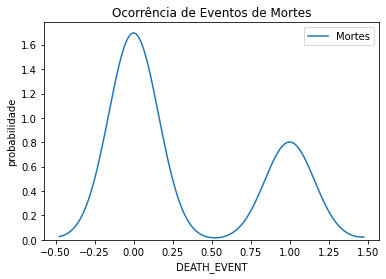

In [ ]:
#Distribuição de probabilidade
import seaborn as sns
sns.distplot(data.DEATH_EVENT , hist=False, rug=False, label='Mortes')
plt.ylabel('probabilidade')
plt.title('Ocorrência de Eventos de Mortes')
plt.show()

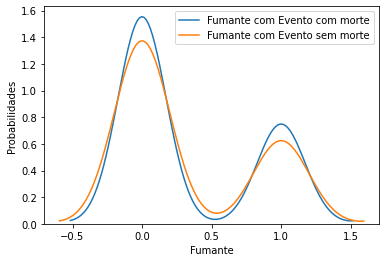

In [ ]:
morte = data[data['DEATH_EVENT']==0].drop(columns=['DEATH_EVENT']).reset_index(drop=True)
semMorte = data[data['DEATH_EVENT']==1].drop(columns=['DEATH_EVENT']).reset_index(drop=True)

#Distribuição de probabilidade entre fumantes e eventos de morte por doença cardiovascular
sns.distplot(morte.smoking, hist=False, rug=False,label='Fumante com Evento com morte')
sns.distplot(semMorte.smoking, hist=False, rug=False,label='Fumante com Evento sem morte')
plt.xlabel('Fumante')
plt.ylabel('Probabilidades')
plt.show()

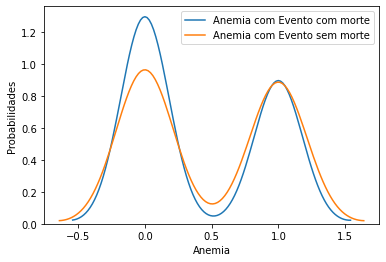

In [ ]:
sns.distplot(morte.anaemia, hist=False, rug=False,label='Anemia com Evento com morte')
sns.distplot(semMorte.anaemia, hist=False, rug=False,label='Anemia com Evento sem morte')
plt.xlabel('Anemia')
plt.ylabel('Probabilidades')
plt.show()

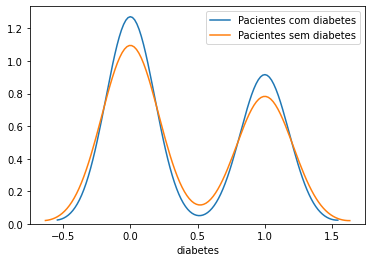

In [ ]:
#Distribuição de probabilidade entre pacientes com diabetes ou não com eventos de morte por dença cardiovascular
sns.distplot(morte.diabetes, hist=False, rug=False, label='Pacientes com diabetes')
sns.distplot(semMorte.diabetes, hist=False, rug=False, label='Pacientes sem diabetes')

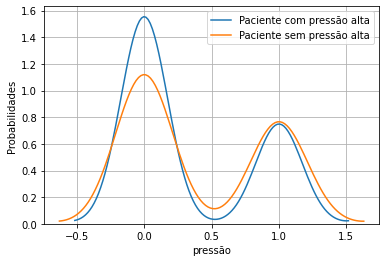

In [ ]:
#Distribuição de probabilidade entre paciente com pressão alta e eventos de morte pordoença cardiovascular
sns.distplot(morte.high_blood_pressure, hist=False, rug=False, label='Paciente com pressão alta')
sns.distplot(semMorte.high_blood_pressure, hist=False, rug=False, label='Paciente sem pressão alta')
plt.xlabel('pressão')
plt.ylabel('Probabilidades')
plt.grid(True)
plt.show()

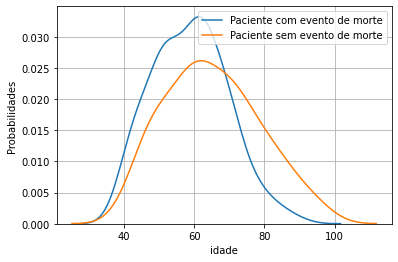

In [ ]:
sns.distplot(morte.age, hist=False, rug=False, label='Paciente com evento de morte')
sns.distplot(semMorte.age, hist=False, rug=False, label='Paciente sem evento de morte')
plt.xlabel('idade')
plt.ylabel('Probabilidades')
plt.grid(True)
plt.show()

**4.2 Disposição estatísticas dos dados**

In [ ]:
#Disposição estatísticas dos dados
corr = data.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


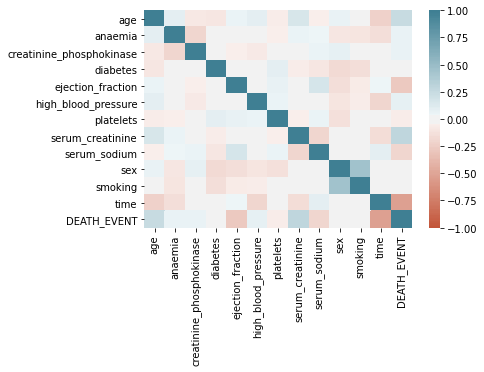

In [ ]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:
corr = data[['age', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']].corr()
corr


,age,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
age,1.000000,-0.101012,0.093289,0.065430,0.018668,0.253729
diabetes,-0.101012,1.000000,-0.012732,-0.157730,-0.147173,-0.001943
high_blood_pressure,0.093289,-0.012732,1.000000,-0.104615,-0.055711,0.079351
sex,0.065430,-0.157730,-0.104615,1.000000,0.445892,-0.004316
smoking,0.018668,-0.147173,-0.055711,0.445892,1.000000,-0.012623
DEATH_EVENT,0.253729,-0.001943,0.079351,-0.004316,-0.012623,1.000000


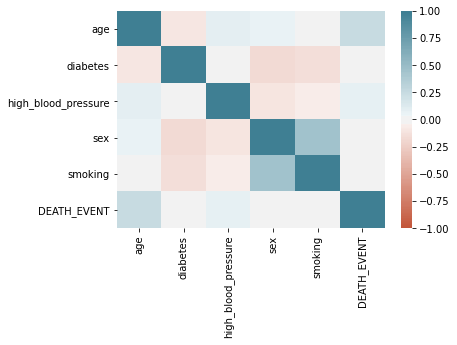

In [ ]:
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:

# estatistica basica dos dados - media
morte.mean()

age                             58.761906
anaemia                          0.408867
creatinine_phosphokinase       540.054187
diabetes                         0.418719
ejection_fraction               40.266010
high_blood_pressure              0.325123
platelets                   266657.489901
serum_creatinine                 1.184877
serum_sodium                   137.216749
sex                              0.650246
smoking                          0.325123
time                           158.339901
dtype: float64

In [ ]:

# estatistica basica dos dados - media
semMorte.mean()

age                             65.215281
anaemia                          0.479167
creatinine_phosphokinase       670.197917
diabetes                         0.416667
ejection_fraction               33.468750
high_blood_pressure              0.406250
platelets                   256381.044792
serum_creatinine                 1.835833
serum_sodium                   135.375000
sex                              0.645833
smoking                          0.312500
time                            70.885417
dtype: float64

In [ ]:
# estatistica basica dos dados - desvio padrao
morte.std()

age                            10.637890
anaemia                         0.492840
creatinine_phosphokinase      753.799572
diabetes                        0.494569
ejection_fraction              10.859963
high_blood_pressure             0.469579
platelets                   97531.202283
serum_creatinine                0.654083
serum_sodium                    3.982923
sex                             0.478071
smoking                         0.469579
time                           67.742872
dtype: float64

In [ ]:
# estatistica basica dos dados - desvio padrao
semMorte.std()

age                            13.214556
anaemia                         0.502188
creatinine_phosphokinase     1316.580640
diabetes                        0.495595
ejection_fraction              12.525303
high_blood_pressure             0.493710
platelets                   98525.682856
serum_creatinine                1.468562
serum_sodium                    5.001579
sex                             0.480771
smoking                         0.465946
time                           62.378281
dtype: float64

**5. Interpretação dos dados**

 A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 recursos que podem ser usados ​​para prever a mortalidade por insuficiência cardíaca.

 Em nossa análise foi analizado cinco dos doze recurso como pode influenciar no desenvolvimento da insuficiência cadíaca. Os cinco recursos são: Diabetes, Pressão alta, Anemia, Fumante e Sexo. Todos os aspectos foram analisados buscado verificar individualmente qual é a relação de cada um dos recurso com eventos de morte de pacientes com insuficiência cadíaca.

 É possível analisar que dentro os cinco recursos utilizados no estudo o que mais trás riscos para o usuário é o fato da Pressão arterial elevada que trás aos seus usuários uma probabilidade maior de óbito para os pacientes que possuem essa doença, comparado com pacientes que não possuem esse mesmo problema.

 Um outro fator de risco são pacientes Fumantes. Esses também possuem uma probabilidade mais alta de óbito com o conjuto de doenças cadíacas junto ao hábito de fumar. Os nossos resultados mostram que a probabilidade de ocorrência de eventos de mortes nesses pacientes é semelhante ao de pacientes com pressão alta.  

 As informações mostram que pessoas que não possuem nenhum desses recursos citados, ou pelo menos, não possuem pressão alta, não são fumantes ou não possuem diabetes tem uma probabilidade muito menor de eventos de morte oriundos de doenças cadíacas. 
